In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

%pylab inline
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Добавим функцию логарифмирования для преобразования Бокса-Кокса
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [3]:
#Считаем данные
ts_df = pd.read_csv('./data2/timeseries.tsv' , sep = '\t', header = None)
ts_df.columns = ['project' , 'date' , 'count_transactions' , 'sum_transactions']

In [4]:
ts_df.shape

(5482, 4)

In [5]:
ts_df.head()

,project,date,count_transactions,sum_transactions
0,1,2016-01-01,119,8108.62
1,1,2016-01-02,139,8715.97
2,1,2016-01-03,130,7565.75
3,1,2016-01-04,146,8159.03
4,1,2016-01-05,137,7591.57


In [6]:
#в датасете собрана информация по 5 проектам с 01.01.2016 по 01.06.2019
#ваша задача
#1+ - Провести визуальный анализ временных рядов
#2+ - Разработать код для препроцессинга данных для создания модели прогнозирования временных рядов
#3 - Разработать модель прогноза временных рядов
#4 - Настроить кросс валидацию модели
#5 - Сделать прогноз суммы транзакций с шагом в день на весь месяц 06.2019 и визуализировать
#6 - сделать прогноз суммы транзакций с шагом в день на весь месяц 12.2015 и визуализировать
#7 - результаты решений 5 и 6 сохранить в csv файл timeseries_result.csv с колонками - project,date,sum_transactions.
#сохранить в csv только данные  за 06.2019 и 12.2015 с шагом в день

In [7]:
#Функция для отображения графика в разрезе проектов
def show_graf(df, col_name = 'sum_transactions'):
    for proj in df.project.unique():
        plt.figure(figsize(15,5))
        df[(df.project == proj)][col_name].plot()
        #df.sum_transactions[df['project'] == proj].plot()
        plt.ylabel('Transactions analysis ' + str(proj))
        pylab.show()

In [8]:
# Посмотрим на датасет полностью, в нем 5 разных временных рядов
pd.set_option('display.max_rows', None)
ts_df

,project,date,count_transactions,sum_transactions
0,1,2016-01-01,119,8108.62
1,1,2016-01-02,139,8715.97
2,1,2016-01-03,130,7565.75
3,1,2016-01-04,146,8159.03
4,1,2016-01-05,137,7591.57
5,1,2016-01-06,134,8558.03
6,1,2016-01-07,134,7471.72
7,1,2016-01-08,131,6756.84
8,1,2016-01-09,132,6788.20
9,1,2016-01-10,130,7228.77


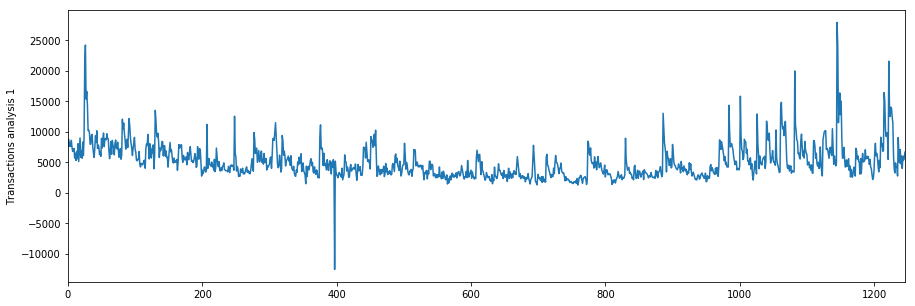

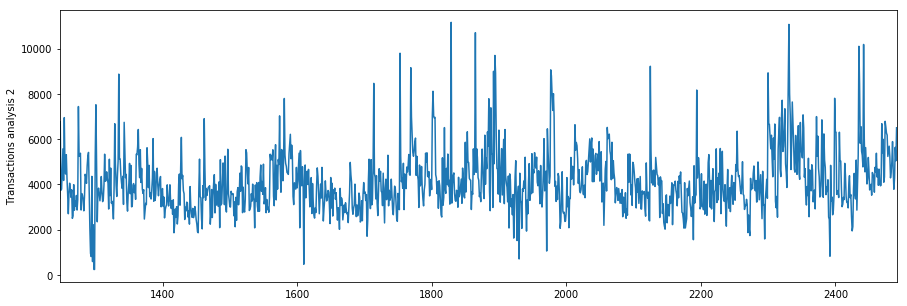

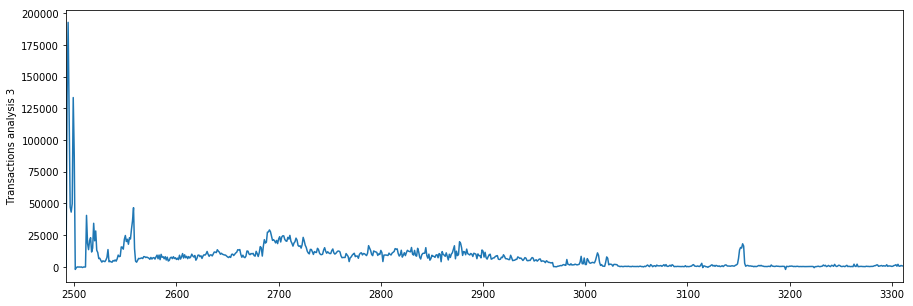

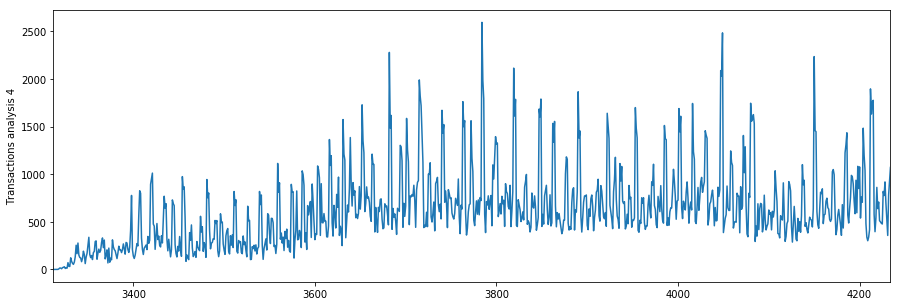

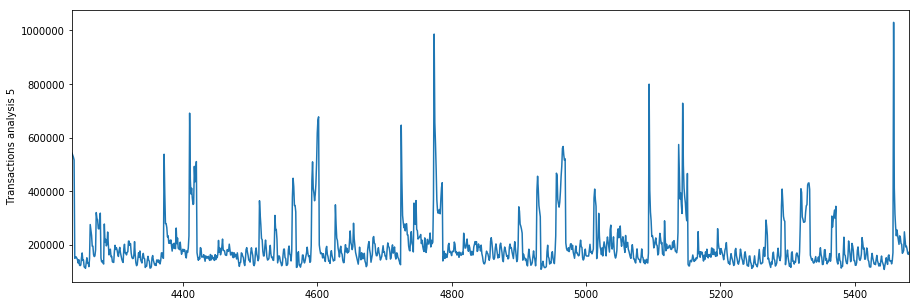

In [9]:
# Отобразим графики
show_graf(ts_df)

In [10]:
#Проверим отрицательные значения
print("Количество значений < 0 :" + str(ts_df[(ts_df.sum_transactions < 0)].shape[0] / ts_df.shape[0]))

#Выполним замену отрицательных значений на нули (сверху пока не ограничиваем)
ts_df.sum_transactions = np.clip(ts_df.sum_transactions, 0, ts_df.sum_transactions.max())

Количество значений < 0 :0.002918642831083546


In [11]:
#Проиндексируем массивы (закомментил до лучших времён)
#ts_df_1.index = pd.DatetimeIndex(data=ts_df_1.date)
#del ts_df_1['date']
#ts_df_2.index = pd.DatetimeIndex(data=ts_df_2.date)
#del ts_df_2['date']
#ts_df_3.index = pd.DatetimeIndex(data=ts_df_3.date)
#del ts_df_3['date']
#ts_df_4.index = pd.DatetimeIndex(data=ts_df_4.date)
#del ts_df_4['date']
#ts_df_5.index = pd.DatetimeIndex(data=ts_df_5.date)
#del ts_df_5['date']

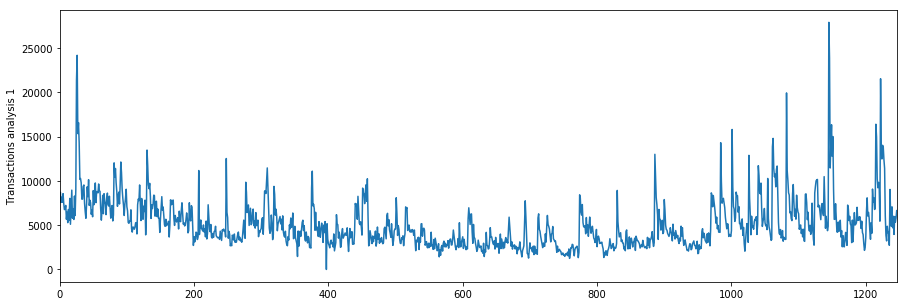

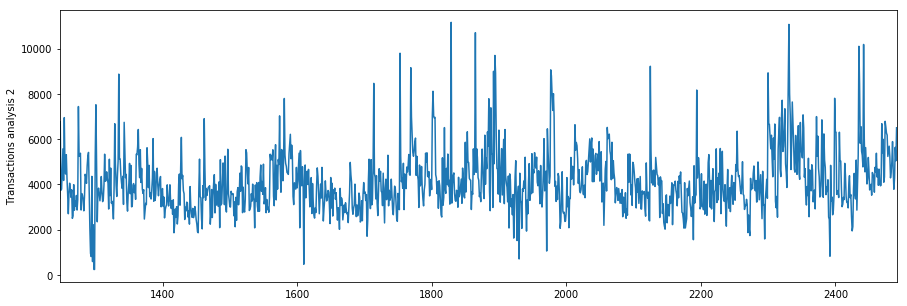

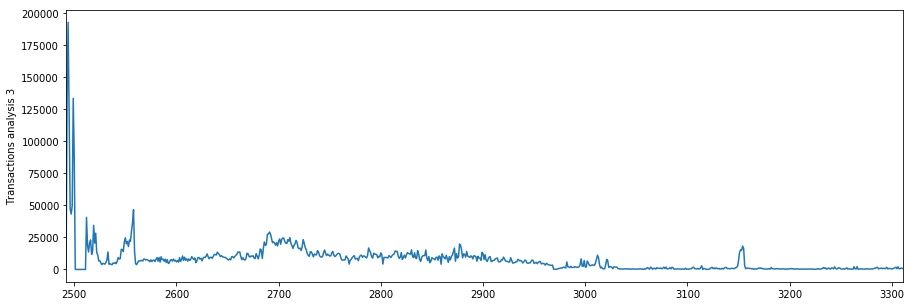

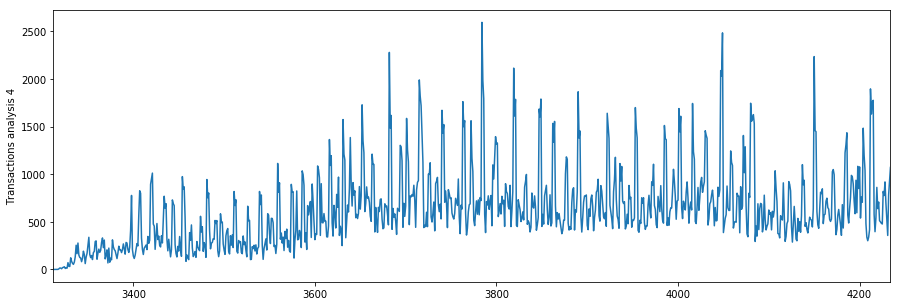

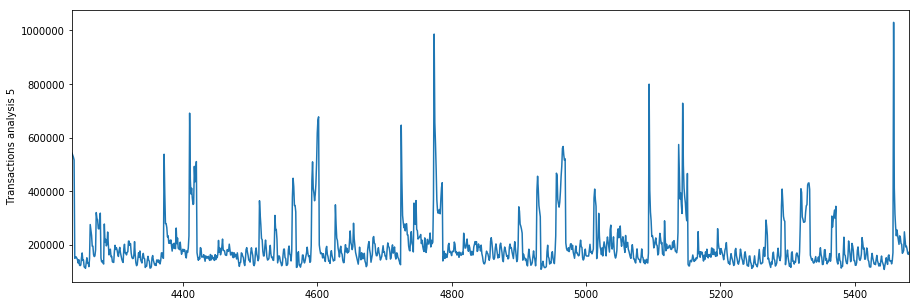

In [12]:
# Отобразим графики без нулевых значений
show_graf(ts_df)

In [13]:
#Ряды нужно проверить на стационарность 
# Визуальный анализ показывает, что 3 проект умер в рамках временного диапазона, а 4 только зародился
# Остальные проекты показывают переменный успех

In [14]:
#Присвоим столбцу с датами тип "Дата" для дальнейшей обработки
ts_df['date'] = pd.to_datetime(ts_df['date'])

In [15]:
#Определим функцию для поиска аномальных значений (правило 3 сигм)
#Помимо этого можно попробовать например отсечь все значения выше 98% квантиля
def thr_sigma(arr):
    mean_arr = np.mean(arr)
    squares = (arr - mean_arr)** 2
    sigma = sum(squares) / len(squares)
    sigma = np.round(np.sqrt(sigma) , 2)
    border = np.mean(arr) + 3*sigma
    return border

In [16]:
ts_df[(ts_df.project == 1)].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246],
           dtype='int64', length=1247)

In [17]:
#Пройдемся по датафрейму в разрезе проектов (цикл фор для этого)
for i in ts_df.project.unique():
    #Установим границу верхнюю
    border = thr_sigma(ts_df[(ts_df.project == i)].sum_transactions)
    #Установим, какую часть значений будем отсекать
    more_sigmas = ts_df[(ts_df.project == i) & (ts_df.sum_transactions > border)].shape[0] / ts_df[(ts_df.project == i)].shape[0] 
    #Переведем в проценты
    print('percent more sigma {0}%'.format(np.round(  more_sigmas*100 , 2)) )
    
    #Заменим аномалии выше границы на значение установленной границы(border)
    proj_ind = ts_df[(ts_df.project == i)].index
    ts_df.loc[proj_ind , 'sum_transactions'] = np.clip(ts_df[(ts_df.project == i)].sum_transactions, 0, border)

    

percent more sigma 1.76%
percent more sigma 1.61%
percent more sigma 0.98%
percent more sigma 1.19%
percent more sigma 2.41%


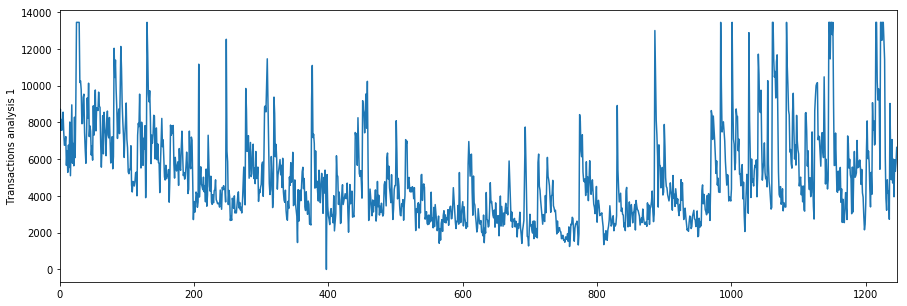

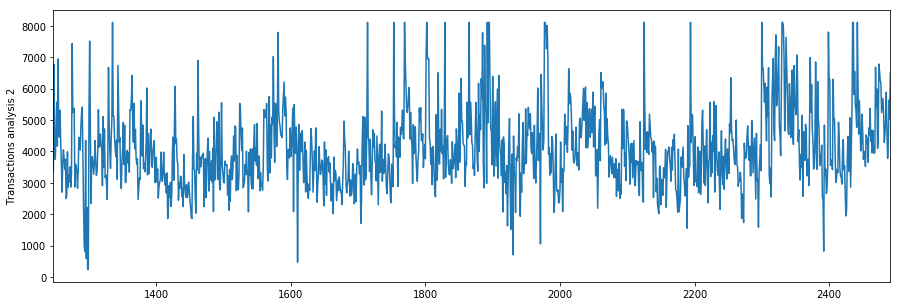

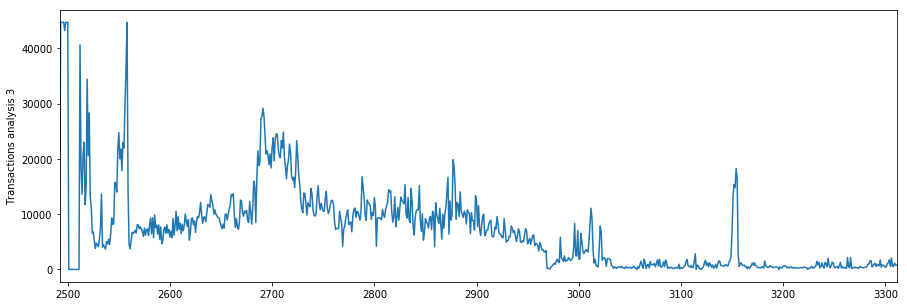

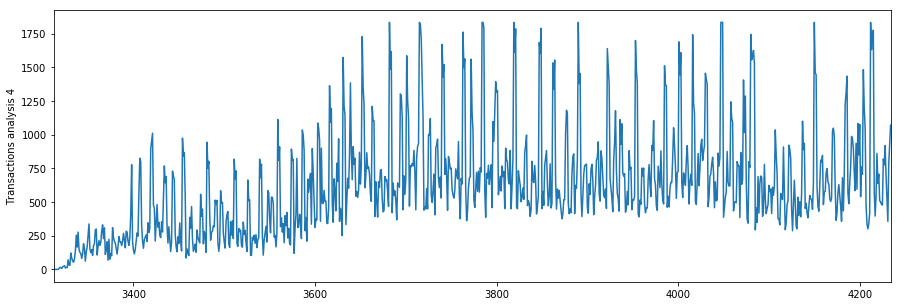

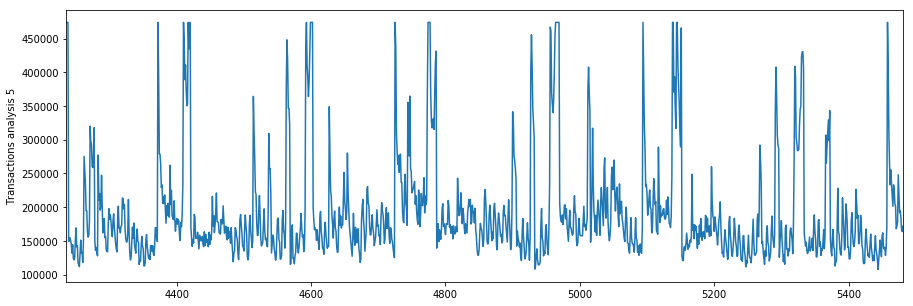

In [18]:
#Построим графики временных рядом с ограничениями сверху и снизу
show_graf(ts_df)

In [19]:
# 100% можно сказать, что проект 3 умирает, предсказывать его можно только по последней части ряда
# Проект 4 нет смысла предсказывать назад, так как он еще не был запущен, там будет 0
# В остальных можно выявить наличие сезонности, проверить стационарность и спрогнозировать ряд

In [20]:
#Напишем функцию для определения стационарности ряда
def DF_test_show(df,ch = 'sum_transactions'):
    plt.figure(figsize(15,5))
    for i in df.project.unique():
        print("project:%i Критерий Дики-Фуллера: p=%f" % (i ,sm.tsa.stattools.adfuller(df[(df.project == i)][ch])[1]))
    

In [21]:
#Выведем 
DF_test_show(ts_df)

project:1 Критерий Дики-Фуллера: p=0.005182
project:2 Критерий Дики-Фуллера: p=0.000163
project:3 Критерий Дики-Фуллера: p=0.168153
project:4 Критерий Дики-Фуллера: p=0.051609
project:5 Критерий Дики-Фуллера: p=0.000000


In [22]:
#Попробуем стабилизировать дисперсии 3 и 4 ряда с помощью преобразования Бокса-Кокса

In [23]:
#Все ряды в порядке, кроме 3, стабилизируем его 
ts_df.sum_transactions += 1
ts_df['sum_transactions_cox'] = np.nan

for i in ts_df.project.unique():
        
    ts_df_p = ts_df[(ts_df.project == i)][:]
    proj_ind = ts_df_p.index
    
    ts_df_p['sum_transactions_cox'] , lmbda = stats.boxcox(ts_df_p.sum_transactions)
    
    ts_df.loc[proj_ind , 'sum_transactions_cox'] = ts_df_p['sum_transactions_cox']
    

C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [24]:
#Выведем 
DF_test_show(ts_df,'sum_transactions_cox')

project:1 Критерий Дики-Фуллера: p=0.006099
project:2 Критерий Дики-Фуллера: p=0.000028
project:3 Критерий Дики-Фуллера: p=0.609123
project:4 Критерий Дики-Фуллера: p=0.005201
project:5 Критерий Дики-Фуллера: p=nan


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


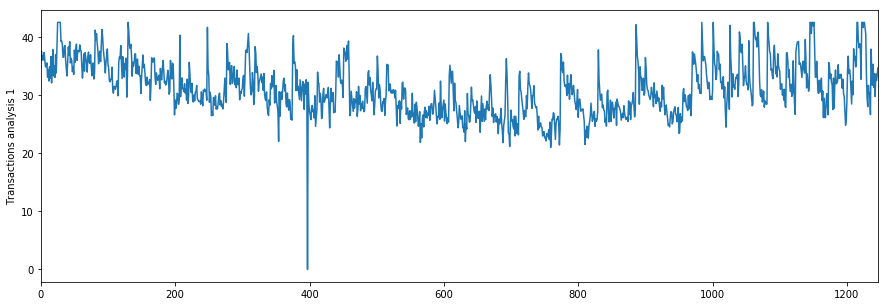

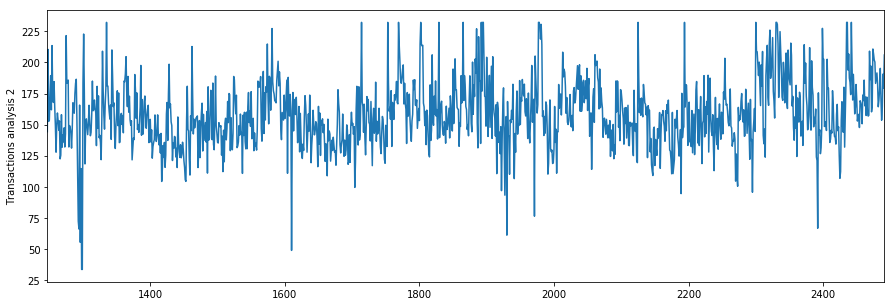

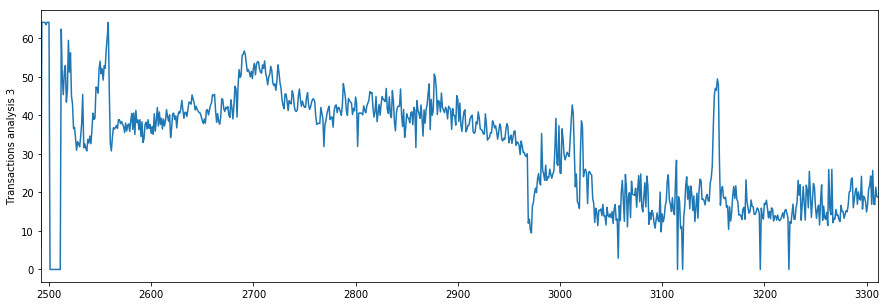

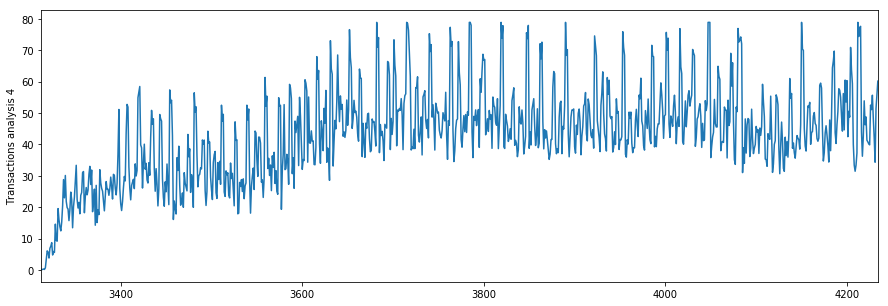

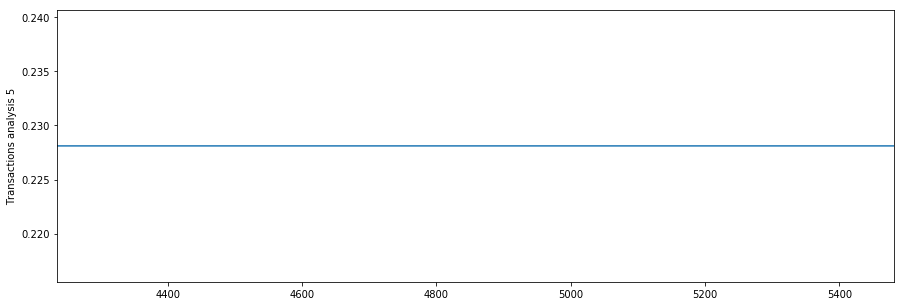

In [25]:
show_graf(ts_df, 'sum_transactions_cox')

In [26]:
#Собственно в 3 ряду умирающий проект, не будем на нем заморачиваться, предскажем конкретно по короткому хвосту результат по нему
#В остальных рядах скорее всего присутсвует определенная сезонность, проверим смещения критерием Стьюдента
#По 5 ряду проект не пережил трансформацию

In [27]:
#давайте стабилизируем тренд единичным дифференцированием
ts_df['sum_transactions_cox_1diff'] = np.nan

for i in ts_df.project.unique():
    ts_df_p = ts_df[(ts_df.project == i)][:]
    proj_ind = ts_df_p.index
    
    ts_df_p['sum_transactions_cox_1diff'] = ts_df_p.sum_transactions_cox - ts_df_p.sum_transactions_cox.shift(1)
    
    ts_df.loc[proj_ind , 'sum_transactions_cox_1diff'] = ts_df_p['sum_transactions_cox_1diff']
    
ts_df.dropna(inplace = True)

In [28]:
def student(arr):
    student = stats.ttest_1samp(arr, 0)[1]
    
    return student

for i in ts_df.project.unique():
    print("project:%i Критерий Стьюдента: p=%f" % (i ,student(ts_df[(ts_df.project == i)].sum_transactions_cox_1diff)))

project:1 Критерий Стьюдента: p=0.984521
project:2 Критерий Стьюдента: p=0.949079
project:3 Критерий Стьюдента: p=0.936456
project:4 Критерий Стьюдента: p=0.854873
project:5 Критерий Стьюдента: p=nan


C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Anton\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


project: 1


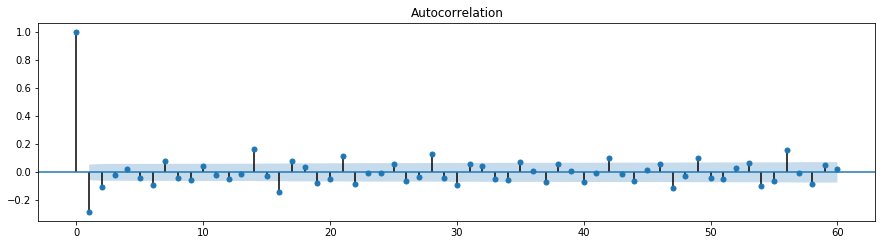

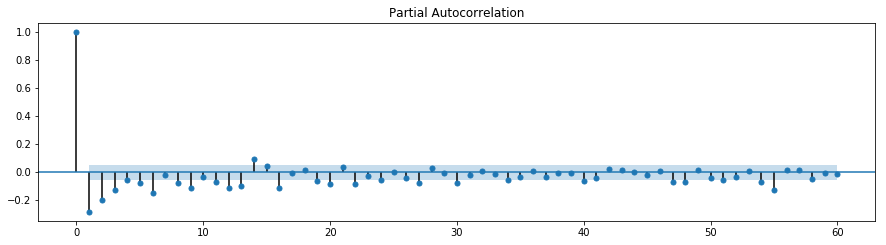

project: 2


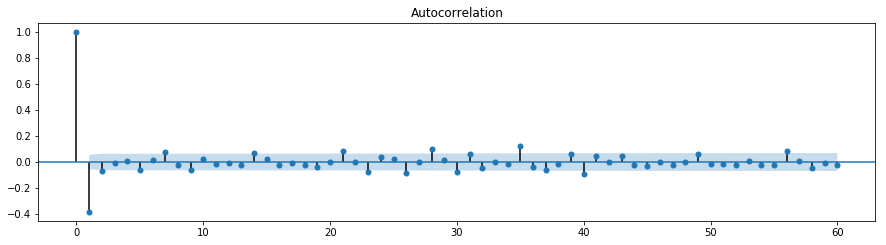

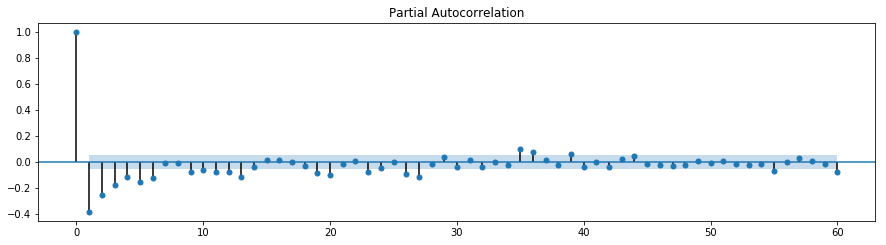

project: 3


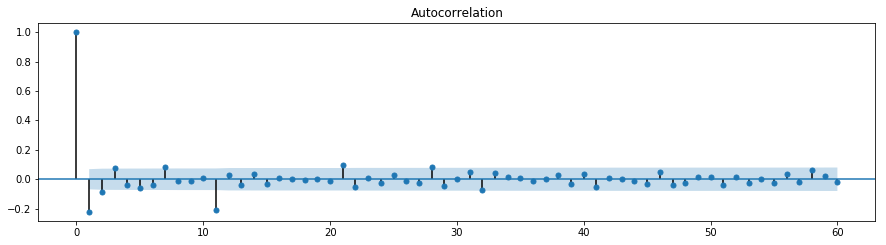

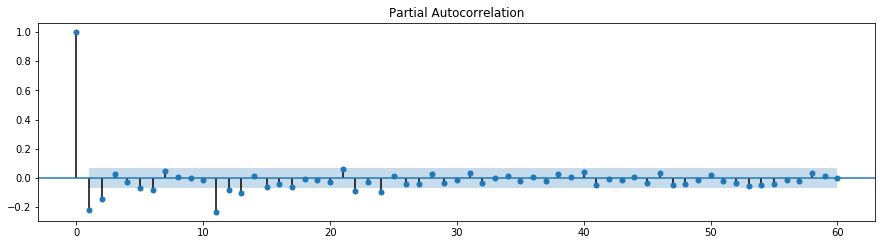

project: 4


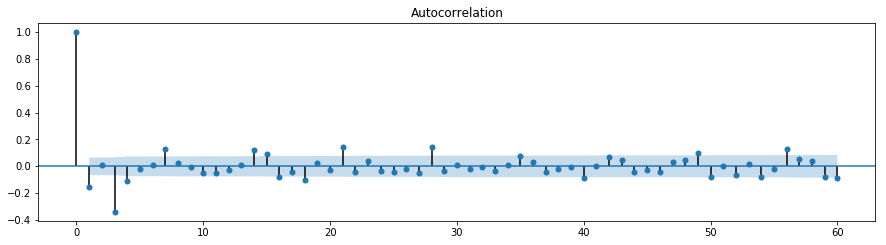

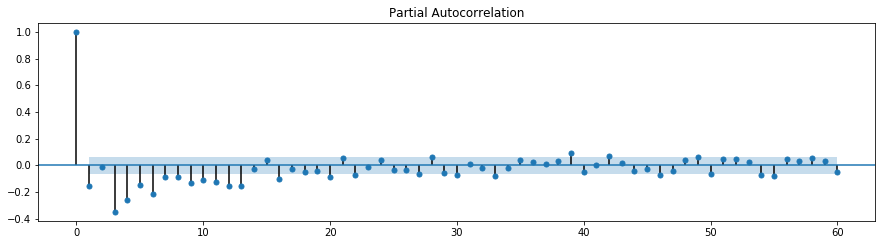

project: 5


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


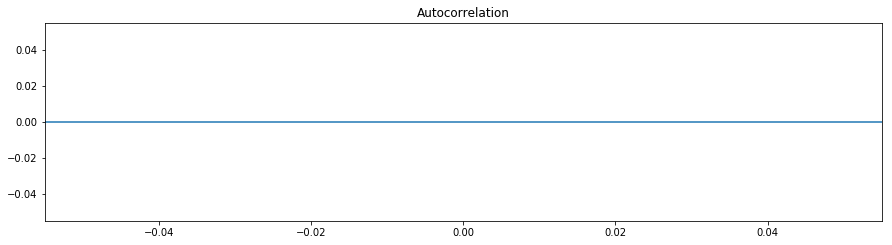

LinAlgError: Singular matrix

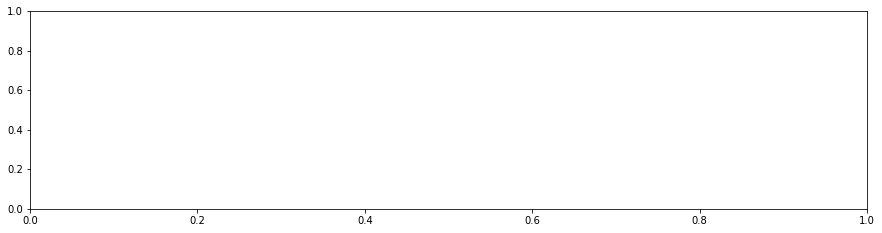

In [29]:
#Построим королелограммы для определения гиперпараметров
for i in ts_df.project.unique():
    print('project:',i)
    plt.figure(figsize(15,8))
    ax = plt.subplot(211)
    sm.graphics.tsa.plot_acf(ts_df[(ts_df.project == i)].sum_transactions_cox_1diff[1:].values.squeeze(), lags=60, ax=ax )
    pylab.show()
    ax = plt.subplot(212)
    sm.graphics.tsa.plot_pacf(ts_df[(ts_df.project == i)].sum_transactions_cox_1diff[1:].values.squeeze(), lags=60, ax=ax)
    pylab.show()

In [30]:
#Выделим каждый проект в отдельную переменную для прогноза
ts_df_1 = ts_df[ts_df['project'] == 1].reset_index()[:]
ts_df_2 = ts_df[ts_df['project'] == 2].reset_index()[:]
ts_df_3 = ts_df[ts_df['project'] == 3].reset_index()[:]
ts_df_4 = ts_df[ts_df['project'] == 4].reset_index()[:]
ts_df_5 = ts_df[ts_df['project'] == 5].reset_index()[:]

In [39]:
def fit_sarima(data, ps, qs, Ps, Qs):
    parameters = product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    results = []
    best_model = []
    best_aic = float("inf")
    warnings.filterwarnings('ignore')

    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:

            model=sm.tsa.statespace.SARIMAX(data.sum_transactions, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue

        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    warnings.filterwarnings('default')
    return best_model, results

In [45]:
#Выполним прогноз на месяц вперёд
def get_month_predict(data_get, model):
    start_p = data_get.shape[0]  -cnt_weeks_to_self_predict*7 * 1
    end_p = data_get.shape[0]  + cnt_weeks_to_self_predict*7 * 1 # прогнозируем на 1 месяц вперед

#отрисуем результат
#with deviation
    pred = model.get_prediction(start = start_p, end = end_p, dynamic=False)
    pred_ci = pred.conf_int()
    #without deviation
    pred_vals = model.predict(start = start_p, end = end_p, dynamic=False)
    pred_vals[pred_vals < 0] = 0

    figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

    ax = data_get['sum_transactions'].plot(label='observed')

    pred_vals.plot(ax=ax, label='predicted', alpha=.7)
    ax.set_xlabel('Time in days')
    ax.set_ylabel('sum usd')
    plt.legend()

    plt.savefig('./images/'+str(i)+'_'+str(look_period)+'.jpg')
    plt.show()

In [41]:
def make_predict(data_pred, ps, qs, Ps, Qs):
    best_model, results = fit_sarima(data_pred, ps, qs, Ps, Qs)
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    best_model.summary()

    #Посчитаем статистические критерии
    plt.figure(figsize(15,8))
    plt.subplot(211)
    best_model.resid[13:].plot()
    plt.ylabel(u'Residuals')

    ax = plt.subplot(212)
    sm.graphics.tsa.plot_acf(best_model.resid[1:].values.squeeze(), lags=48, ax=ax)

    print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[1:], 0)[1])
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[1:])[1])

    #Спрогнозируем результаты для 1 модели
    get_month_predict(data_pred, best_model)

In [35]:
# На основании полученной информации подберем гиперпараметры и построим модель
from itertools import product

#последний значимый несезонный лаг в pacf
ps = range(2, 3)
#Порядок интегрированного ряда (1 в нашем случае)
d=1 
#последний значимый несезонный лаг в acf
qs = range(0, 2)
#Ищем в pacf последний значимый лаг
Ps = range(0, 2)
D=1
#Ищем в acf значимый лаг, лучше последний, для ускорения расчетов возьмем поменьше, комп не потянет
Qs = range(0, 2)
cnt_weeks_to_self_predict = 4
look_period = 270

#На личном компе я могу позволить себе около 8 параметров, иначе слишком долго подбор осуществляется

     parameters           aic
5  (2, 1, 0, 1)  21632.960197
7  (2, 1, 1, 1)  21683.097917
3  (2, 0, 1, 1)  21721.175969
1  (2, 0, 0, 1)  21722.579647
6  (2, 1, 1, 0)  22071.383115
Критерий Стьюдента: p=0.733645
Критерий Дики-Фуллера: p=0.000000


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


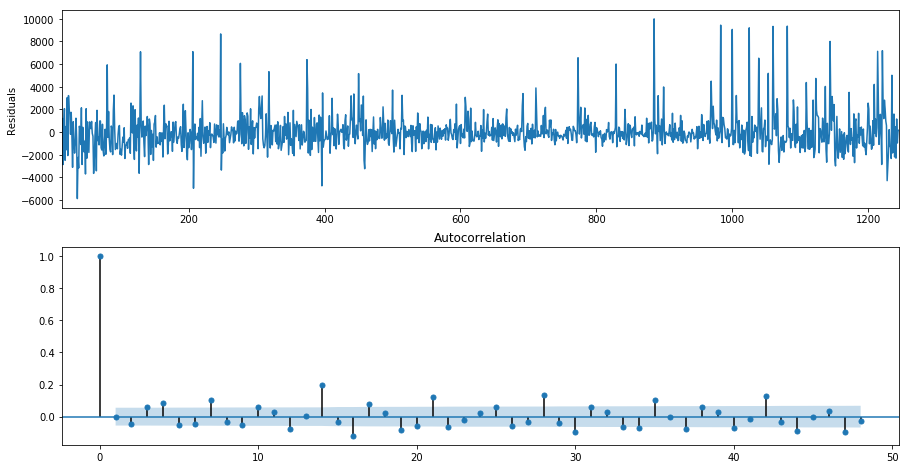

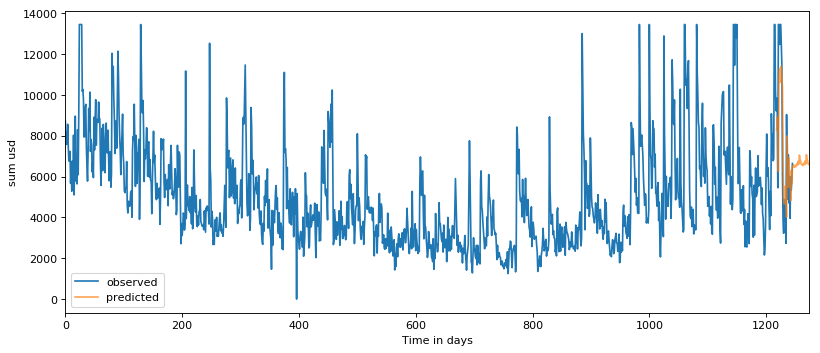

In [46]:
 make_predict(ts_df_1, ps, qs, Ps, Qs)

     parameters           aic
5  (2, 1, 0, 1)  20740.302275
7  (2, 1, 1, 1)  20741.231709
1  (2, 0, 0, 1)  20876.024708
3  (2, 0, 1, 1)  20877.262074
6  (2, 1, 1, 0)  21155.788901
Критерий Стьюдента: p=0.716648
Критерий Дики-Фуллера: p=0.000000


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


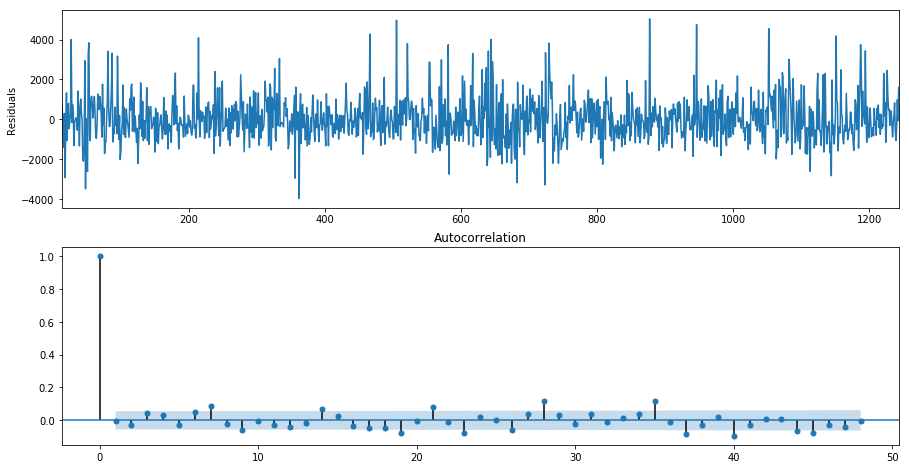

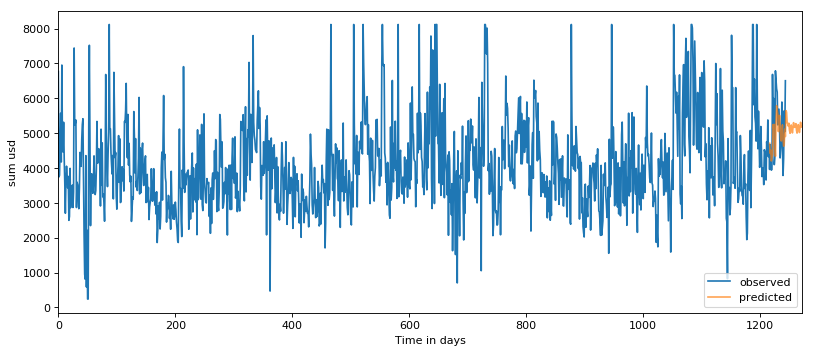

In [48]:
ps = range(2, 3)
#Порядок интегрированного ряда (1 в нашем случае)
#последний значимый несезонный лаг в acf
qs = range(0, 2)
#Ищем в pacf последний значимый лаг
Ps = range(0, 2)
#Ищем в acf значимый лаг, лучше последний, для ускорения расчетов возьмем поменьше, комп не потянет
Qs = range(0, 2)

make_predict(ts_df_2, ps, qs, Ps, Qs)

wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 1, 0, 1)
     parameters         aic
2  (2, 0, 1, 1)  590.510386
1  (2, 0, 1, 0)  592.032396
5  (2, 1, 1, 1)  592.425246
4  (2, 1, 1, 0)  594.075817
0  (2, 0, 0, 0)  596.802560
Критерий Стьюдента: p=0.848338
Критерий Дики-Фуллера: p=0.000000


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


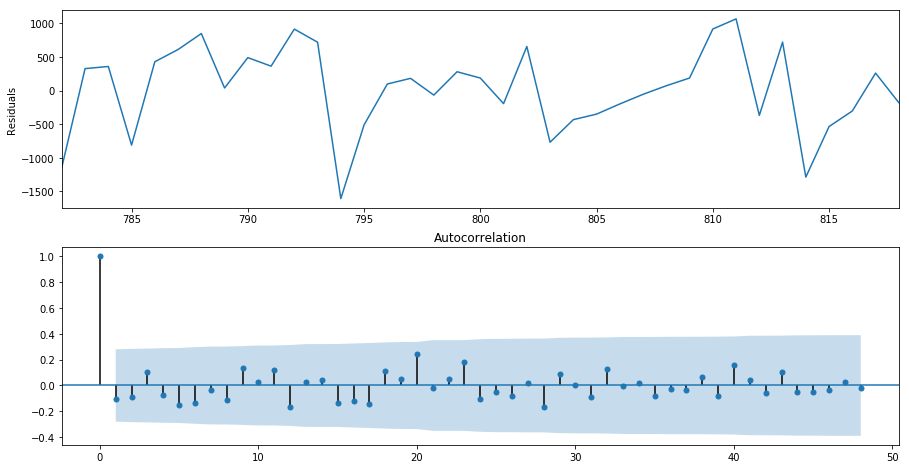

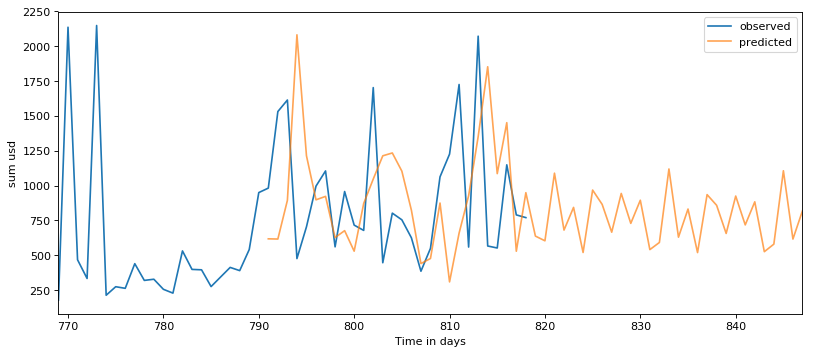

In [56]:
ps = range(2, 3)
#Порядок интегрированного ряда (1 в нашем случае)
#последний значимый несезонный лаг в acf
qs = range(0, 2)
#Ищем в pacf последний значимый лаг
Ps = range(0, 2)
#Ищем в acf значимый лаг, лучше последний, для ускорения расчетов возьмем поменьше, комп не потянет
Qs = range(0, 2)

#Укорачиваем период временного ряда и получаем критерий Стьюдента Выше
make_predict(ts_df_3[-50:], ps, qs, Ps, Qs)

wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
     parameters           aic
1  (2, 0, 0, 1)  13090.506386
3  (2, 0, 1, 1)  13091.108074
2  (2, 0, 1, 0)  13449.596399
0  (2, 0, 0, 0)  13708.751846
Критерий Стьюдента: p=0.935393
Критерий Дики-Фуллера: p=0.000000


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


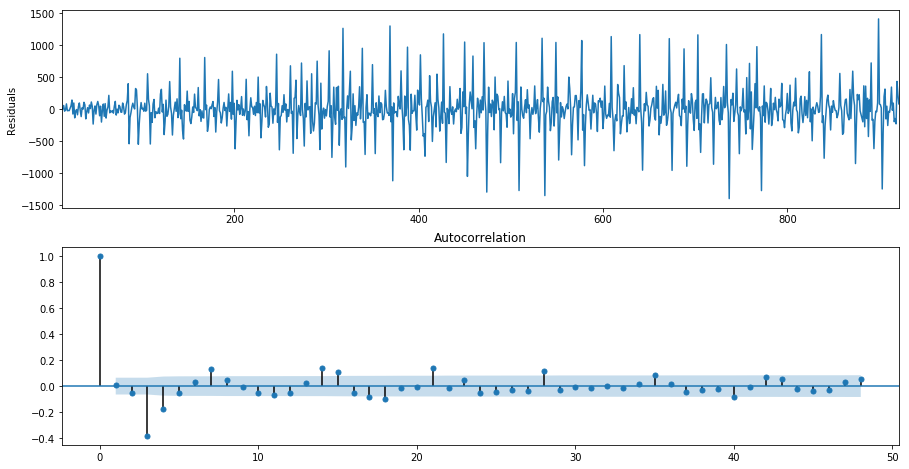

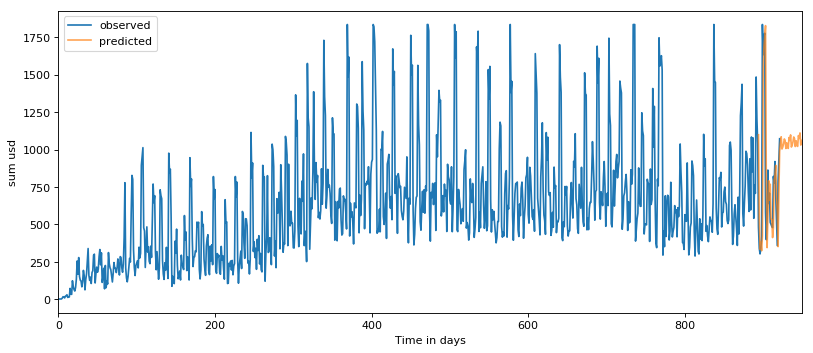

In [50]:
ps = range(2, 3)
#Порядок интегрированного ряда (1 в нашем случае)
#последний значимый несезонный лаг в acf
qs = range(0, 2)
#Ищем в pacf последний значимый лаг
Ps = range(0, 2)
#Ищем в acf значимый лаг, лучше последний, для ускорения расчетов возьмем поменьше, комп не потянет
Qs = range(0, 2)

make_predict(ts_df_4, ps, qs, Ps, Qs)

     parameters           aic
1  (2, 1, 0, 1)  30277.661440
3  (2, 1, 1, 1)  30278.774616
2  (2, 1, 1, 0)  30534.278816
0  (2, 1, 0, 0)  30781.301579
Критерий Стьюдента: p=0.027953
Критерий Дики-Фуллера: p=0.000000


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: DeprecationWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: DeprecationWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


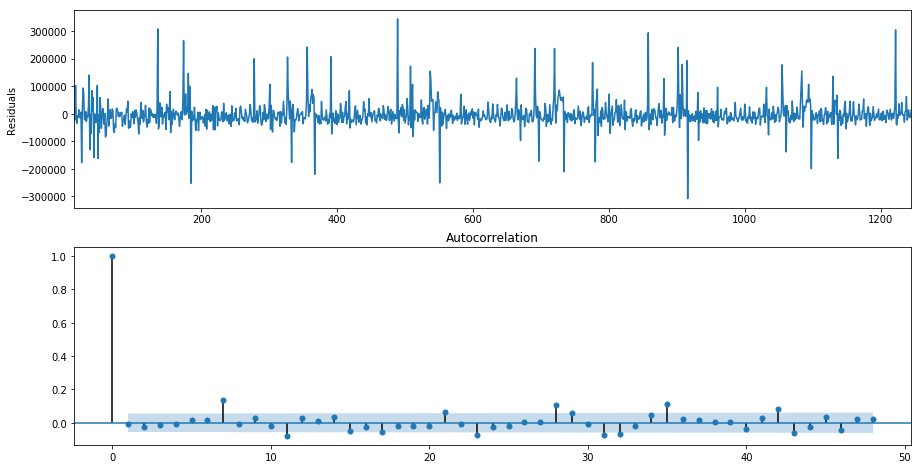

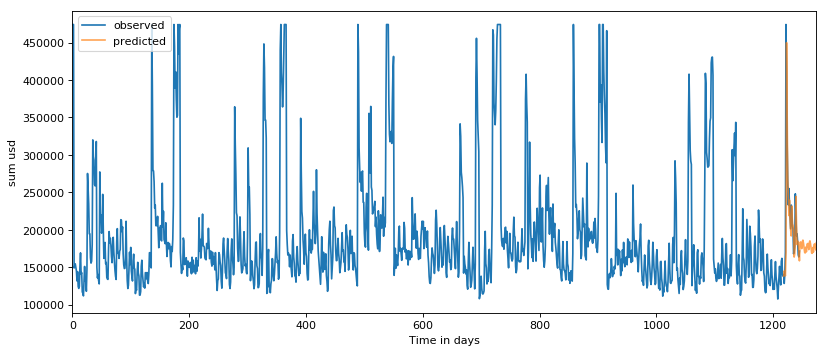

In [60]:
ps = range(2, 3)
#Порядок интегрированного ряда (1 в нашем случае)
#последний значимый несезонный лаг в acf
qs = range(1, 2)
#Ищем в pacf последний значимый лаг
Ps = range(0, 2)
#Ищем в acf значимый лаг, лучше последний, для ускорения расчетов возьмем поменьше, комп не потянет
Qs = range(0, 2)

make_predict(ts_df_5, ps, qs, Ps, Qs)
#В данном случае явно гиперпараметры должны быть больше, так как сезонность повторяется через 7 дней, моих можностей и времени не хватает 